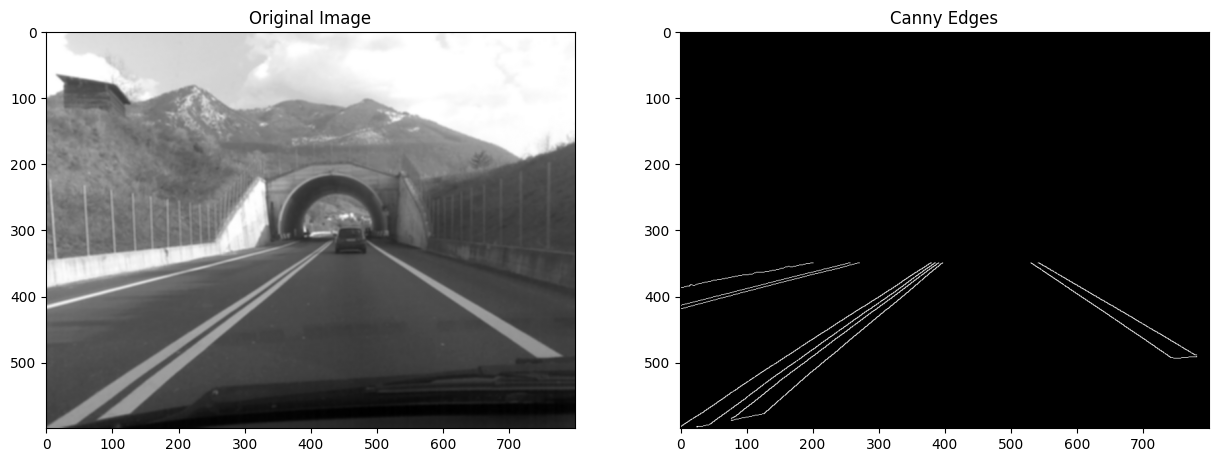

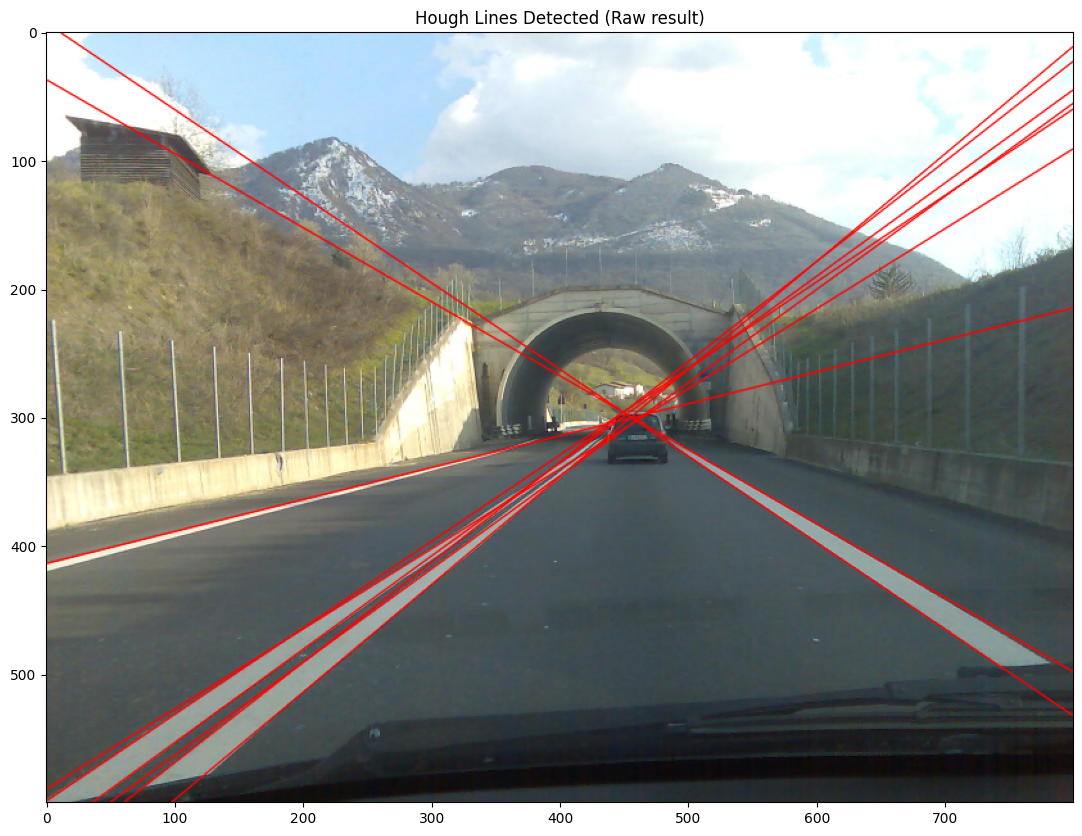

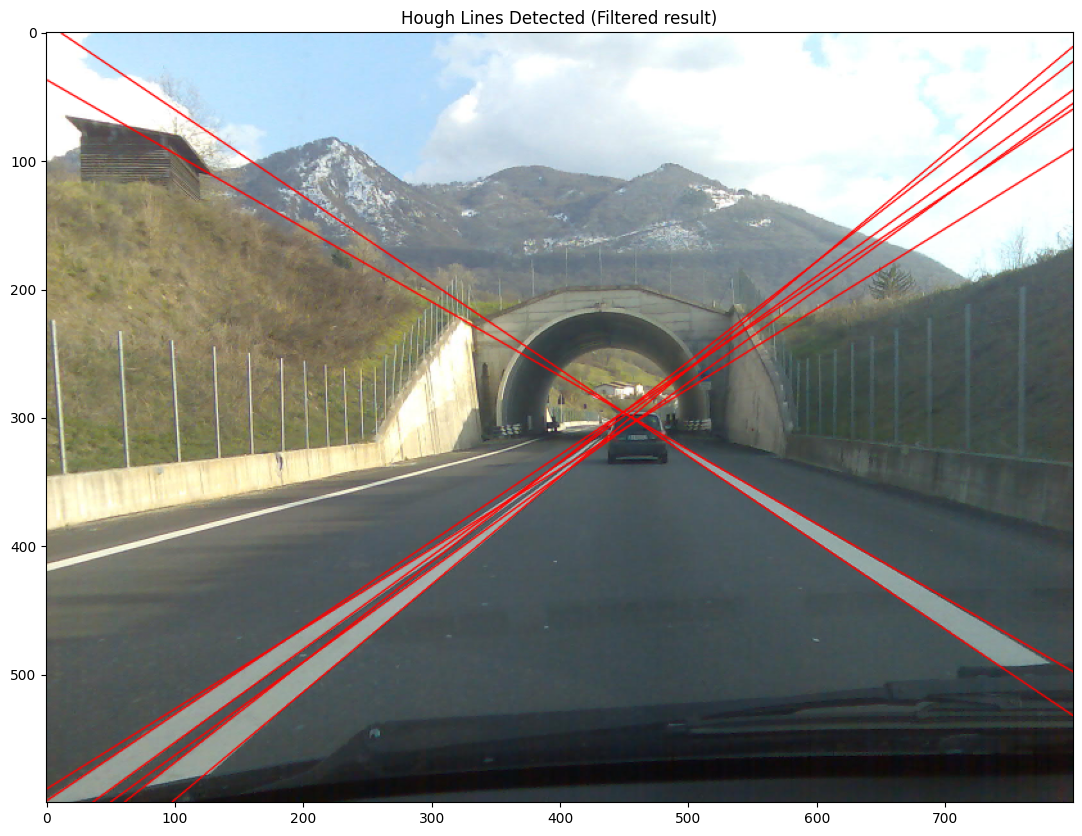

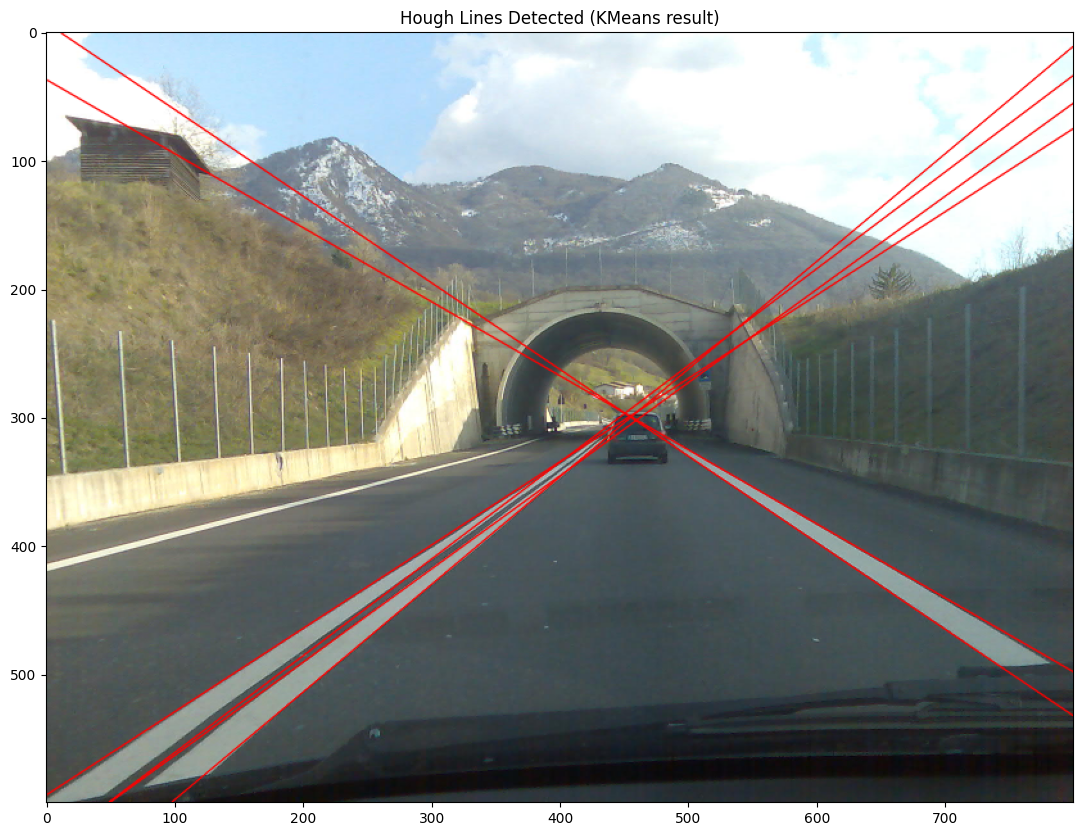

In [20]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = [15, 10]

'''Original image with cv2.imread'''
sourceImagePath = '../../data/lesson_4/Strada_Provinciale_BS_510_Sebina_Orientale.jpg'
# sourceImagePath = '../../data/lesson_4/passenger-car-road.jpg'
img = cv2.imread(sourceImagePath)

if img is None:
    raise FileNotFoundError(f"Image not found at {sourceImagePath}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

'''Added Gaussian blur to reduce noise before edge detection'''
img_gray = cv2.GaussianBlur(img_gray, (5, 5), 1.5)
edges = cv2.Canny(img_gray, 100, 150)

edges[0:350] = 0

lines = cv2.HoughLines(edges, 2, np.deg2rad(2), 190)
if lines is None:
    raise ValueError("No lines detected. Adjust the parameters of HoughLines or check the input image.")

lines = lines[:, 0, :]
result = np.copy(img)

for line in lines:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)



plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.figure()
plt.imshow(result)
plt.title('Hough Lines Detected (Raw result)')
plt.show()

filtered_lines = []
for line in lines:
    theta = line[1]
    theta_deg = np.rad2deg(theta)
    approx = 20
    horizontal_degrees = 90
    if abs(theta_deg - horizontal_degrees) > approx:
        filtered_lines.append(line)

result = np.copy(img)

for line in filtered_lines:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)

plt.figure()
plt.imshow(result)
plt.title('Hough Lines Detected (Filtered result)')
plt.show()

if len(filtered_lines) == 0:
    raise ValueError("No lines left after filtering. Adjust the filtering criteria or check the input image.")

kmeans = KMeans(n_clusters=6).fit(filtered_lines)
kmeans.cluster_centers_

result = np.copy(img)
for line in kmeans.cluster_centers_:
    rho = line[0]
    theta = line[1]

    a = math.cos(theta)
    b = math.sin(theta)

    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
    pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
    cv2.line(result, pt1, pt2, 255, 1, cv2.LINE_AA)
plt.figure()
plt.imshow(result)
plt.title('Hough Lines Detected (KMeans result)')
plt.show()

Do you see anything strange in the final result?
> Да, паралельные линии, не идеально параллельные, так же можно заметить что некоторые линии не были обнаружены

Do you think the Hough transform resolution is important for obtaining a good result? Why?
> Да, мелкий шаг по ро и тета дают более точные результаты

Do you think the Hough transform accumulator threshold is important for obtaining a good result? Why?
> Да если порог слишком высокий то можно пропустить некоторые линии, а если слишком низки то будут ложные линии или шум